# 1. Import libraries

In [1]:
import io
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score, confusion_matrix

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

# 2. Import datasets

In [4]:
df = pd.read_csv("../outputs/model.csv")
df.shape

(1000, 7)

# 3. Model 

In [5]:
y = df['Y']
x = df[['loan_amount', 'months', 'history', 'age', 'purpose']]

In [6]:
x = sm.add_constant(x)
log_reg = sm.Logit(y, x).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.517473
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Jul 2022   Pseudo R-squ.:                  0.1529
Time:                        22:30:30   Log-Likelihood:                -517.47
converged:                       True   LL-Null:                       -610.86
Covariance Type:            nonrobust   LLR p-value:                 1.903e-38
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.8124      0.634    -12.325      0.000      -9.055      -6.570
loan_amount     3.6839    

# 4. AUROC and Gini

In [7]:
pred_values = log_reg.predict(x)
pred_values = pd.DataFrame(pred_values)[0]
print('AUROC:',np.round(roc_auc_score(y, pred_values), 3))

AUROC: 0.774


In [8]:
auroc = roc_auc_score(y, pred_values)
gini = 2 * auroc - 1
print('Gini:',np.round(gini, 3))

Gini: 0.548


# 5. Confusion Matrix

In [9]:
train_dict = {'actuals':y, 'predicted':pred_values}
test_calc = pd.DataFrame(train_dict)

min f:  0.2


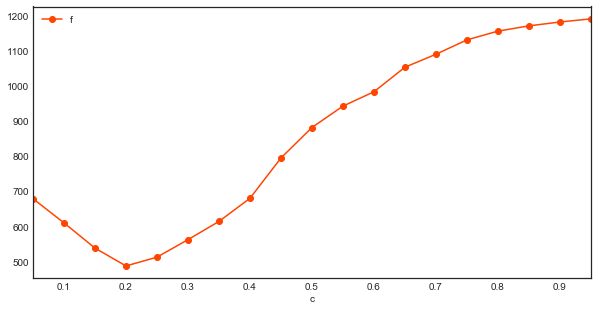

In [10]:
c = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
f = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
i = 0
for j in c:
    def flag(x):
        if x > j: return 1
        else: return 0
    test_calc['flag'] = test_calc['predicted'].apply(flag)
    df_table = confusion_matrix(test_calc['actuals'],test_calc['flag'])
    f[i] = (1*df_table[0,1]) + (4*df_table[1,0])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','f']
f_max = df_decision[df_decision['f']==df_decision['f'].min()].head(1)
max_f = float(f_max['c'])

df_decision.plot(x='c',y='f',marker="o", color='orangered')
print ("min f: ",max_f)

In [11]:
def cut_off (x):
    if x > 0.2: return 1
    else: return 0
test_calc['flag'] = test_calc['predicted'].apply(cut_off)
print(confusion_matrix(test_calc['actuals'],test_calc['flag']))

[[369 331]
 [ 39 261]]


In [12]:
c = confusion_matrix(test_calc['actuals'],test_calc['flag'])
print('Accuracy:',np.round((c[0][0] + c[1][1]) / c.sum(),3))

Accuracy: 0.63


In [13]:
print('cost :',(1*c[0,1]) + (4*c[1,0]))

cost : 487
